# Adidas Sales Dataset

In [5]:
import pandas as pd

data = pd.read_excel("Adidas_Sales_Dataset.xlsx")

display(data)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


### a. List all the products sold in every region.

In [6]:
for i,j in data.groupby("Region")["Product"]:
    print("-"*50)
    print(i)
    print("-"*50)
    display(j.drop_duplicates().reset_index())
    print("\n")

--------------------------------------------------
Midwest
--------------------------------------------------


,index,Product
0,288,Men's Apparel
1,289,Women's Apparel
2,290,Men's Street Footwear
3,291,Men's Athletic Footwear
4,292,Women's Street Footwear
5,293,Women's Athletic Footwear




--------------------------------------------------
Northeast
--------------------------------------------------


,index,Product
0,0,Men's Street Footwear
1,1,Men's Athletic Footwear
2,2,Women's Street Footwear
3,3,Women's Athletic Footwear
4,4,Men's Apparel
5,5,Women's Apparel




--------------------------------------------------
South
--------------------------------------------------


,index,Product
0,72,Men's Apparel
1,73,Women's Apparel
2,74,Men's Street Footwear
3,75,Men's Athletic Footwear
4,76,Women's Street Footwear
5,77,Women's Athletic Footwear




--------------------------------------------------
Southeast
--------------------------------------------------


,index,Product
0,720,Men's Apparel
1,721,Women's Apparel
2,722,Men's Street Footwear
3,723,Men's Athletic Footwear
4,724,Women's Street Footwear
5,725,Women's Athletic Footwear




--------------------------------------------------
West
--------------------------------------------------


,index,Product
0,144,Men's Apparel
1,145,Women's Apparel
2,146,Men's Street Footwear
3,147,Men's Athletic Footwear
4,148,Women's Street Footwear
5,149,Women's Athletic Footwear


### b. Find the Cities and the retailers who sold womens related products.

In [7]:
women_products = data[data['Product'].str.contains('women', case=False)]

display(women_products[['City', 'Retailer', 'Product']].drop_duplicates())

,City,Retailer,Product
2,New York,Foot Locker,Women's Street Footwear
3,New York,Foot Locker,Women's Athletic Footwear
5,New York,Foot Locker,Women's Apparel
47,New York,Walmart,Women's Apparel
50,New York,Walmart,Women's Street Footwear
...,...,...,...
3818,Manchester,Amazon,Women's Apparel
3821,Manchester,Amazon,Women's Street Footwear
3863,Manchester,Foot Locker,Women's Street Footwear
3864,Manchester,Foot Locker,Women's Athletic Footwear


### c. Find the total sales of each womens product in in-store method.

In [9]:
women_sales = data['Product'].str.contains('women', case=False)
in_store_sales = data['Sales Method'] == 'In-store'

women_instore_sales = data[women_sales & in_store_sales]

display(women_instore_sales.groupby('Product')['Total Sales'].sum().reset_index())

,Product,Total Sales
0,Women's Apparel,70248750.0
1,Women's Athletic Footwear,40520000.0
2,Women's Street Footwear,48349250.0


### d. For each product, find region wise total sales and units sold.

In [13]:
df = data.groupby(['Product', 'Region'])[['Total Sales', 'Units Sold']]

display(df.sum())

Total Sales  Units Sold
Product                   Region                            
Men's Apparel             Midwest     18125661.0       45304
                          Northeast   25744412.0       62031
                          South       19703069.0       60641
                          Southeast   24461487.0       54385
                          West        35694003.0       84322
Men's Athletic Footwear   Midwest     21305539.0       65120
                          Northeast   28874237.0       81474
                          South       25710545.0       90079
                          Southeast   27777020.0       71129
                          West        50006339.0      127724
Men's Street Footwear     Midwest     38322810.0      109861
                          Northeast   51025024.0      134252
                          South       28444561.0      106545
                          Southeast   36019236.0       91867
                          West        55014613.0      150795
Women's Apparel           Midwest     28206383.0       69435
                          Northeast   37543083.0       90048
                          South       29607187.0       88740
                          Southeast   31491161.0       68839
                          West        52191046.0      116765
Women's Athletic Footwear Midwest     13595168.0       44808
                          Northeast   19796138.0       59464
                          South       18420722.0       63998
                          Southeast   20302798.0       55292
                          West        34517070.0       93674
Women's Street Footwear   Midwest     16244898.0       56809
                          Northeast   23341173.0       74010
                          South       22777097.0       82257
                          Southeast   23119534.0       65488
                          West        42520111.0      113705

### e. For men’s and women’s products, find state wise units sold and total sales.

In [14]:
df = data[data['Product'].str.contains('men', case=False)]

display(df.groupby(['Product', 'State'])[['Units Sold', 'Total Sales']].sum())

Units Sold  Total Sales
Product                 State                                 
Men's Apparel           Alabama              7285    2211662.0
                        Alaska               3211    1677524.0
                        Arizona              5233    1890308.0
                        Arkansas             6354    1991980.0
                        California          22543    8862102.0
...                                           ...          ...
Women's Street Footwear Virginia             9048    3464940.0
                        Washington           7968    4229292.0
                        West Virginia        4207    1175780.0
                        Wisconsin            3281     803727.0
                        Wyoming              7584    2422141.0

[300 rows x 2 columns]

### f. Find states where women’s products sold were more than men’s products.

In [15]:
for k,v  in df.groupby('State'):
    menSales = v[v['Product'].str.contains('Women')]['Total Sales'].sum()
    womenSales = v[v['Product'].str.contains('Men')]['Total Sales'].sum()
    if womenSales > menSales:
        print(k)

Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


### g. Find region wise units sold for each product.

In [17]:
display(data.groupby(['Product', 'Region'])[['Units Sold']].sum())

Units Sold
Product                   Region               
Men's Apparel             Midwest         45304
                          Northeast       62031
                          South           60641
                          Southeast       54385
                          West            84322
Men's Athletic Footwear   Midwest         65120
                          Northeast       81474
                          South           90079
                          Southeast       71129
                          West           127724
Men's Street Footwear     Midwest        109861
                          Northeast      134252
                          South          106545
                          Southeast       91867
                          West           150795
Women's Apparel           Midwest         69435
                          Northeast       90048
                          South           88740
                          Southeast       68839
                          West           116765
Women's Athletic Footwear Midwest         44808
                          Northeast       59464
                          South           63998
                          Southeast       55292
                          West            93674
Women's Street Footwear   Midwest         56809
                          Northeast       74010
                          South           82257
                          Southeast       65488
                          West           113705

### h. Find region wise profit for every retailer.

In [19]:
display(data.groupby(['Retailer', 'Region'])[['Operating Profit']].sum())

Operating Profit
Retailer      Region                     
Amazon        Midwest          6833799.77
              Northeast       13398857.39
              South             146947.48
              Southeast        4295093.92
              West             4143804.75
Foot Locker   Midwest         18245522.25
              Northeast       23914657.67
              South            3679974.61
              Southeast       22531766.77
              West            12350203.51
Kohl's        Midwest          8552968.56
              Northeast        5172709.52
              South            1357041.07
              West            21728533.43
Sports Direct Midwest         10684443.80
              Northeast        8395056.41
              South           29929290.77
              Southeast       20755652.47
              West             4568511.51
Walmart       Northeast        4617137.52
              South           13021021.24
              Southeast        6446690.73
              West             1697203.12
West Gear     Midwest          8494612.10
              Northeast       12522169.14
              South           13003728.90
              Southeast        6526212.81
              West            45121150.23

### i. Find the states along with units sold where products sold in more than one city in the state.

In [20]:
city_count = data.groupby(['State', 'Product']).agg({'Units Sold': 'sum'})

display(city_count[city_count > 1])

Units Sold
State   Product                              
Alabama Men's Apparel                    7285
        Men's Athletic Footwear         12232
        Men's Street Footwear           12612
        Women's Apparel                 11828
        Women's Athletic Footwear        8003
...                                       ...
Wyoming Men's Athletic Footwear          8261
        Men's Street Footwear           11426
        Women's Apparel                  9074
        Women's Athletic Footwear        6900
        Women's Street Footwear          7584

[300 rows x 1 columns]

### j. Draw plot to show monthly sales in 2020 in every region.

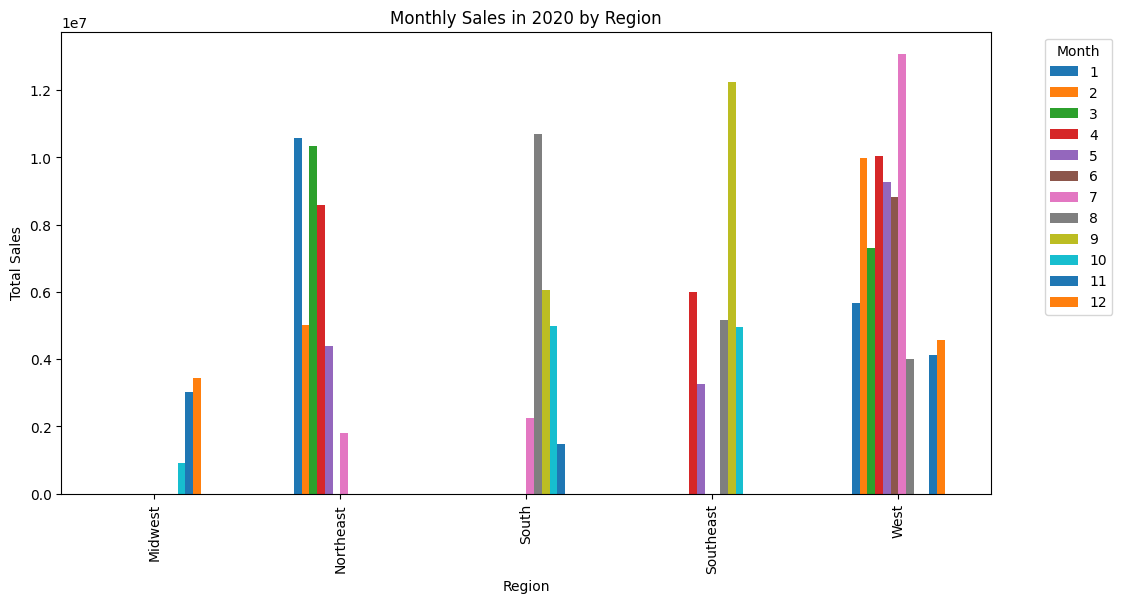

In [23]:
import matplotlib.pyplot as plt

data['Month'] = data['Invoice Date'].dt.month
data['Year'] = data['Invoice Date'].dt.year

sales_2020 = data[data['Year'] == 2020]
monthly_sales = sales_2020.groupby(['Region', 'Month'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales.plot(kind='bar', ax=ax)

plt.title('Monthly Sales in 2020 by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### k. Draw the plot to show year wise sales in every region.

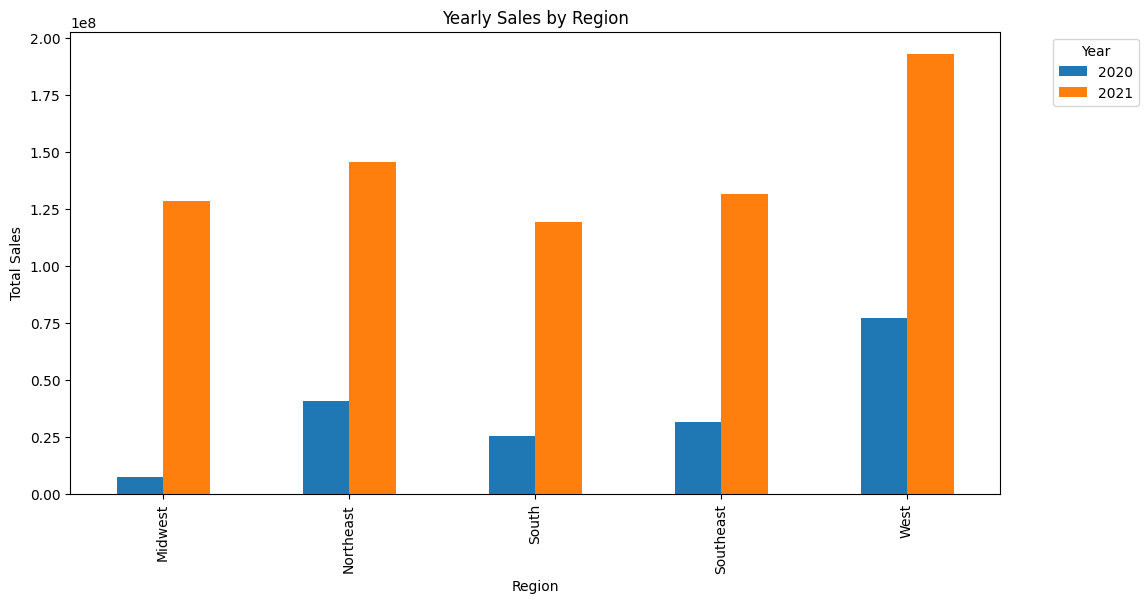

In [25]:
yearly_sales = data.groupby(['Region', 'Year'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
yearly_sales.plot(kind='bar', ax=ax)

plt.title('Yearly Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### l. Draw plots to show Region wise sales in every year.

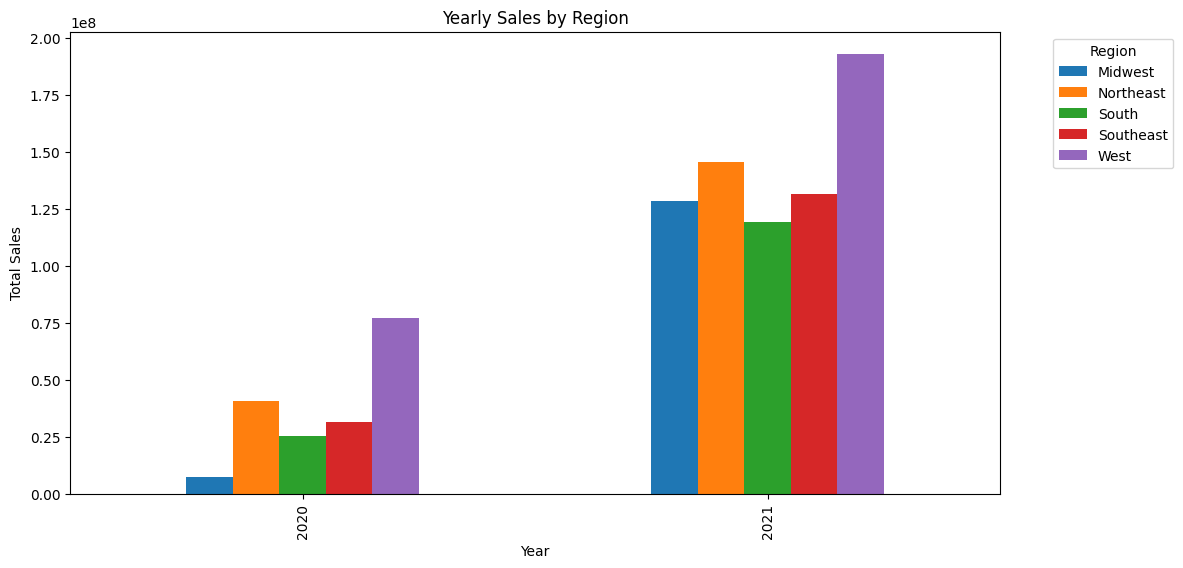

In [27]:
yearly_sales = data.groupby(['Year', 'Region'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
yearly_sales.plot(kind='bar', ax=ax)

plt.title('Yearly Sales by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()